In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, Image


# **Visualização de Dados Criativa**

A visualização de dados desempenha um papel fundamental na ciência de dados, pois é através da representação gráfica que as informações contidas nos conjuntos de dados podem ser compreendidas, interpretadas e comunicadas de maneira mais eficaz.


# Importância

1. **Compreensão Inicial dos Dados:** Antes de realizar análises mais avançadas, a visualização de dados proporciona uma visão inicial do conjunto de dados. Gráficos simples podem revelar padrões, tendências e anomalias que podem orientar as etapas subsequentes da análise.

2. **Identificação de Padrões e Tendências:** Gráficos e visualizações permitem identificar padrões e tendências nos dados que podem não ser imediatamente óbvios em uma tabela de números. Isso é crucial para tomar decisões informadas e derivar insights valiosos.

3. **Comunicação Eficaz:** A ciência de dados muitas vezes envolve colaboração com partes interessadas que podem não ter conhecimento técnico. Visualizações simplificam conceitos complexos, facilitando a comunicação de resultados e conclusões de maneira compreensível para um público mais amplo.

4. **Validação de Resultados:** A visualização de dados pode ajudar na validação de resultados obtidos por algoritmos ou modelos. Se os resultados parecerem surpreendentes ou contraditórios, uma visualização pode ajudar a confirmar ou refutar esses resultados.

5. **Identificação de Outliers e Anomalias:** Gráficos e visualizações facilitam a identificação de outliers e anomalias nos dados. Essas observações atípicas podem ter um impacto significativo nos resultados da análise e devem ser investigadas.

# Possíveis Visualizações:

In [48]:
ufo_data = pd.read_csv('dados.csv', low_memory=False, header=None)

explicacoes = ufo_data.iloc[0]

ufo_data = pd.concat([explicacoes.to_frame().T, ufo_data], ignore_index=True)

nomes_colunas = {
    0: 'datetime',
    1: 'city',
    2: 'state',
    3: 'country',
    4: 'shape',
    5: 'duration (seconds)',
    6: 'duration (hours/min)',
    7: 'comments',
    8: 'date posted',
    9: 'latitude',
    10: 'longitude'
}

ufo_data = ufo_data.rename(columns=nomes_colunas)

ufo_data


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
2,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
3,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
4,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
...,...,...,...,...,...,...,...,...,...,...,...
80328,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80329,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.2025
80330,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80331,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


O conjunto de dados utilizado acima faz referência ao avistamento de OVNIs realizado por centros de astronomia, interessante para chamar a visualização e trazer análises.

Antes de iniciar a análise, é crucial entender a estrutura dos dados. Segue uma visualização



In [21]:
ufo_data[['latitude']].describe()

,latitude
count,80331
unique,18445
top,47.6063889
freq,581


In [22]:
ufo_data[['longitude']].describe()

,longitude
count,80331.000000
mean,-86.772746
std,39.697432
min,-176.658056
25%,-112.073333
50%,-87.903611
75%,-78.755000
max,178.441900


A diferença de dados nessas duas tabelas referem-se a forma como os dados se encontram e se estão presentes ou não. Na coluna de latitude os valores são bem diferentes da longitude, logo as interpretções são diferentes.
# Distribuição dos Dados (Anos):

Segue uma distribuição relativa de avistamento de OVNIs em relação aos anos que foram passando.

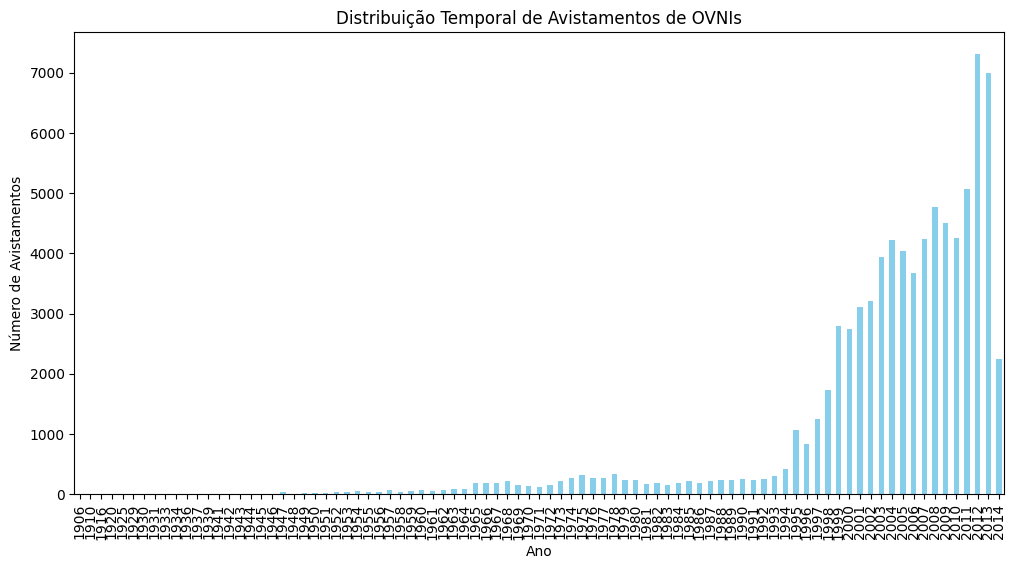

In [ ]:
ufo_data = pd.read_csv('dados.csv', low_memory=False)

ufo_data.rename(columns={'10/10/1949 20:30': 'datetime'}, inplace=True)

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M', errors='coerce')

ufo_data_copy = ufo_data.copy()

ufo_data_copy = ufo_data_copy.dropna(subset=['datetime'])

ufo_data_copy['year'] = ufo_data_copy['datetime'].dt.year

count_by_year = ufo_data_copy['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
count_by_year.plot(kind='bar', color='skyblue')
plt.title('Distribuição Temporal de Avistamentos de OVNIs')
plt.xlabel('Ano')
plt.ylabel('Número de Avistamentos')
plt.show()


# Principais Formas Visualizadas:

Isso são descrições subjetivas fornecidas por testemunhas oculares (viram com seus próprios olhos) que relatam avistamentos desses objetos. Não há uma padronização ou classificação oficial para as formas de OVNIs, e elas variam amplamente nas descrições.

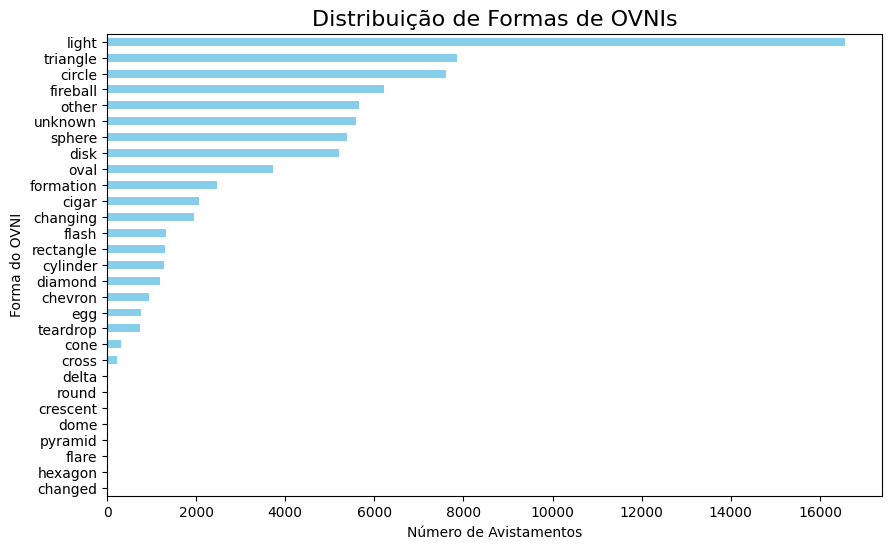

In [69]:
ufo_data = pd.read_csv('dados.csv', low_memory=False)

ufo_data.columns = ['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
                    'duration', 'comments', 'date_posted', 'latitude', 'longitude']

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

ufo_data['year'] = ufo_data['datetime'].dt.year

shape_counts = ufo_data['shape'].value_counts()

plt.figure(figsize=(10, 6))
shape_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribuição de Formas de OVNIs', fontsize=16)
plt.xlabel('Número de Avistamentos')
plt.ylabel('Forma do OVNI')
plt.show()


Dados os valores desse gráfico, os 3 principais modelos visualizados foram:

1. *Light* (Luz): Foram avistados apenas um ponto de luz, sem identificação de um formato específico.
2. *Triangle* (Triângulo): Foram identificados OVNIs no modelo triângular.
3. *Circle* (Círculo): Foram avistados OVNIs no modelo circular.

# Gráfico de Calor das Distribuições:

In [23]:
import pandas as pd
import plotly.express as px

ufo_data = pd.read_csv('dados.csv', low_memory=False)

ufo_data.columns = ['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
                    'duration', 'comments', 'date_posted', 'latitude', 'longitude']

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

ufo_data['year'] = ufo_data['datetime'].dt.year

ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_data['longitude'], errors='coerce')

center_europe = {'lat': 51.1657, 'lon': 10.4515}

fig = px.scatter_geo(ufo_data, lat='latitude', lon='longitude', color='year',
                     center=center_europe, scope='europe', projection='natural earth')

fig.update_layout(title='Distribuição Geográfica de Avistamentos de OVNIs na Europa',
                  margin=dict(l=0, r=0, t=40, b=0))

fig.show()


As coordenadas aproximadas para o centro da Europa são:

1. Latitude: 51.1657
2. Longitude: 10.4515

Essa classificação é distribuída de acordo com a distribuição durante a passagem dos anos.

# Conclusão

O intuito desse notebook foi trabalhar com a visualização das diferentes formas de visualização de dados de uma forma criativa e demonstrar as várias possíveis observações. Para esse material foi utilizado o csv encontrado em:

Link: https://raw.githubusercontent.com/planetsig/ufo-reports/master/csv-data/ufo-scrubbed-geocoded-time-standardized.csv

 E material utilizado para exemplo:

Site: https://www.tableau.com/pt-br/learn/articles/best-beautiful-data-visualization-examples